# CASO PRACTIVO REGRESIÓN MULTIPLE LINEAL

### Participantes GRUPO 3:

Juan José Cabrera, 
Marco Vinicio Chasiluisa, 
Luis Felipe Contreras, 
Ana Belén Erazo


### 1. Importe la base de datos a una base en Jupyter Notebook con pandas.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

Para la regresión y validación de supuestos llamamos a statsmodel, el módulo encargado de la notación de fórmula y al módulo para las pruebas de hipótesis.

In [3]:
import statsmodels.stats.api as sms
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.compat import lzip

Ahora ,  llamemos a nuestra base de datos a nuestro espacio en el Jupyer Notebook:

In [38]:
df=pd.read_csv("Dummy Data HSS Final.csv")
df

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181
...,...,...,...,...,...
4541,26.0,4.472360,0.717090,Micro,94.685866
4542,71.0,20.610685,6.545573,Nano,249.101915
4543,44.0,19.800072,5.096192,Micro,163.631457
4544,71.0,17.534640,1.940873,Macro,253.610411


#### Recodificar el nombre de las columnas a español

In [85]:
df.rename({'TV':'TV', 'Radio': 'Radio', 'Social Media':'Social_Media', 'Influencer': 'Influencer', 'Sales':'Ventas' }, axis=1, inplace=True)

### 2. Obtenga los descriptivos resumen de la base de datos e identifique las variables numéricas y categóricas. Indique ¿hay algo que le llame la atención? 


En dataset podemos encontrar 5 campos. De ellos, tres son variables númericas: TV, Radio y Ventas. Y solo existe una variable categórica que es Influencer.

#### Análisis de valores descriptivos

In [86]:
df.describe()

,TV,Radio,Social_Media,Influencer,Ventas,log_Ventas,log_ventas
count,4518.000000,4518.000000,4518.000000,4518.000000,4518.000000,4518.000000,4518.000000
mean,53.883134,18.064468,3.277464,1.508189,191.769611,5.105350,5.105350
std,26.064455,9.612435,2.137665,1.113167,92.874117,0.594765,0.594765
min,10.000000,0.000684,0.000031,0.000000,31.199409,3.440399,3.440399
25%,32.000000,10.454293,1.523577,1.000000,112.195546,4.720243,4.720243
50%,53.000000,17.780677,3.041391,2.000000,188.119673,5.237078,5.237078
75%,76.000000,25.460786,4.775610,2.000000,271.130964,5.602602,5.602602
max,100.000000,48.871161,9.638966,3.000000,364.079751,5.897373,5.897373


Lo que se puede decir de la tabla descriptiva sobre el presupuesto de cada medio de comunicación durante el corte del dataset es lo siguiente:

En promedio a lo que más se asigna presupuesto es a TV y el menor es a Social Media.
La desviación estándar de TV indica mayor variabilidad en la inversión en publicidad que las de Radio o Social Media.

### 3. Evalúe si la base contiene datos perdidos.

La base de datos sí contiene valores nulos en todos los campos.

Para tener un mejor resultado y que los datos sean lo más cercanos a la realidad, estos registros en null fueron eliminados.

Los valores por campos fueron los siguientes:

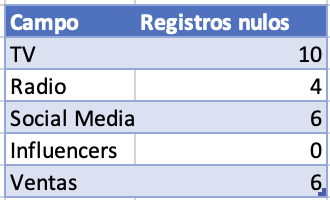


Como resultado, tenemos un total de 4546 registros.


### 4. Evalúe si alguna de las variables contiene datos atípicos (outliers). De ser el caso detalle cuáles y qué método estadístico aplicaran para corregir. 

#### Análisis de valores extremos

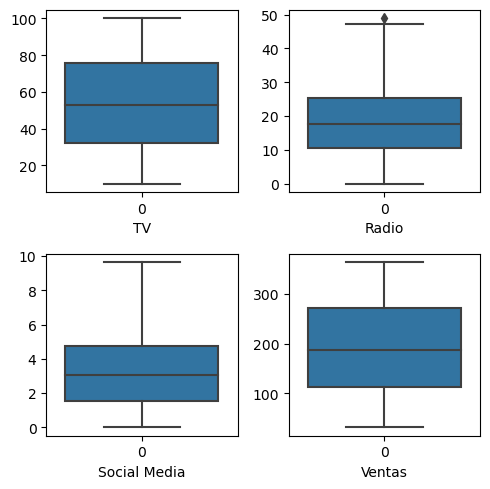

In [88]:
# Box plots
fig, axs = plt.subplots(2,2, figsize = (5,5))
plt1 = sns.boxplot(df['TV'], ax = axs[0,0]).set(xlabel='TV')
plt2 = sns.boxplot(df['Radio'], ax = axs[0,1]).set(xlabel='Radio')
plt3 = sns.boxplot(df['Social_Media'], ax = axs[1,0]).set(xlabel='Social Media')
plt2 = sns.boxplot(df['Ventas'], ax = axs[1,1]).set(xlabel='Ventas')

plt.tight_layout()

De la gráfica de boxplot, podemos ver que la variable donde se requiere el tratamiento de valores extremos es en el de social media. 

Para los valores de TV, Radio y Ventas no se tiene suficientes datos extremos y su distancia de la media no es tan extrema.

#### Tratamiento de valores atípicos


In [89]:
# Calculamos el Quartil 1 y Quartil 3 que son aquellos que nos permiten estimar los límites de los datos atípicos
Q1 = df['Social_Media'].quantile(0.25)
Q3 = df['Social_Media'].quantile(0.75)

print("Q1: ")
print(Q1)
print("Q3: ")
print(Q3)

IQR = Q3 - Q1  #rango intercuartil
print("IQR: ")
print(IQR)

Q1: 
1.5235765752500001
Q3: 
4.77560987
IQR: 
3.2520332947500004


In [90]:
# Ahora removemos aquellas observaciones que se encuentran por fuera del rango: 1.5 x IOR
df = df[~((df['Social_Media'] < (Q1 - 1.5 * IQR)) |(df['Social_Media'] > (Q3 + 1.5 * IQR)))]
df.shape

(4518, 7)

### 5. Grafique las distribuciones de las variables y a priori comente sobre ellas. 

<Axes: xlabel='TV', ylabel='Density'>

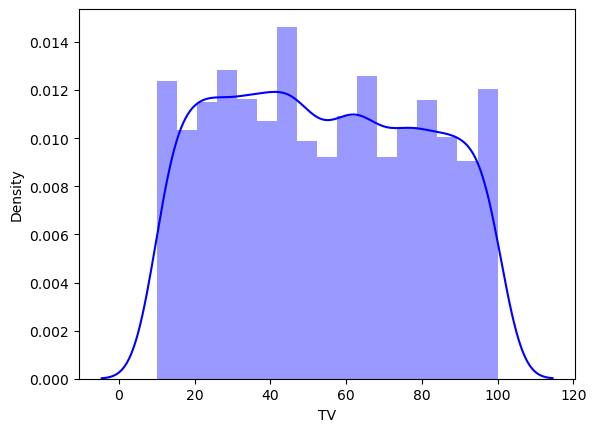

In [91]:
sns.distplot(df['TV'],color="blue")

<Axes: xlabel='Radio', ylabel='Density'>

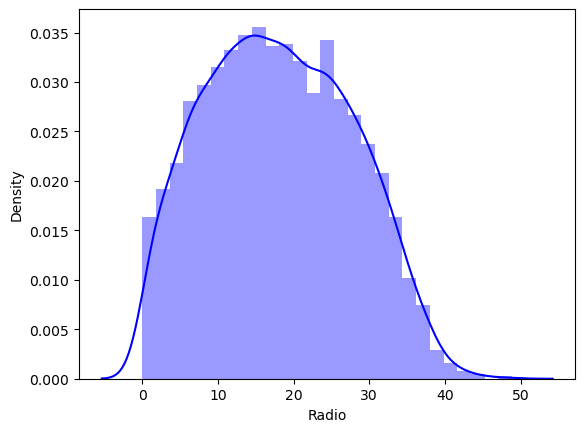

In [48]:
sns.distplot(df['Radio'],color="blue")

<Axes: xlabel='Social Media', ylabel='Density'>

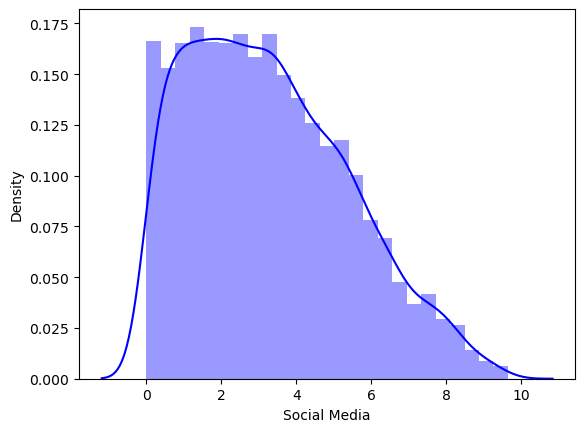

In [46]:
sns.distplot(df['Social_Media'],color="blue")

<Axes: xlabel='Ventas', ylabel='Density'>

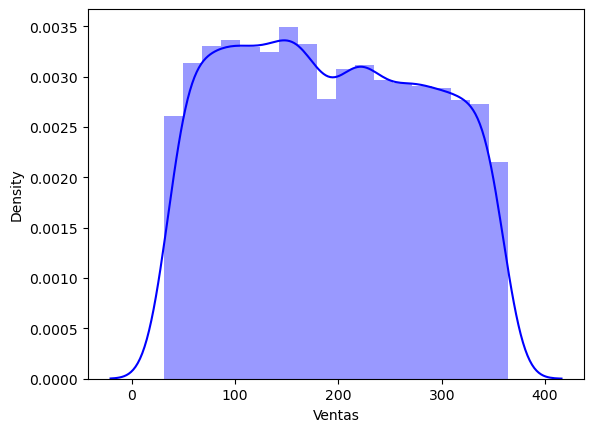

In [52]:
sns.distplot(df['Ventas'],color="blue")

En el primer gráficos podemos ver como el presupuesto de la televisión y su influencia tiene un relación positiva , mientras que las redes sociales y radio decae poco a poco, cada vez la prioridad se ve afectada con menos presupuesto. Las ventas se mantienen constantes pese a que la inversión de radio y redes sociales se vieron con un menor presupuesto.

Según la gráfica de Social Media se ve una distribución normal de cola derecha sería que la mayoría de los valores se concentran en el extremo izquierdo de la distribución, con una cola larga y extendida hacia la derecha. Esto sugiere que hay una asimetría en los datos, con valores más bajos siendo más frecuentes que los valores más altos. Además, la media estaría desplazada hacia la derecha, con una mediana y una moda menores que la media.

En la gráfica de Ventas los valores están mayoritariamente ubicados entre la primera y la segunda desviación estándar es que la distribución de los datos sigue una distribución normal. Esto sugiere que la mayoría de los datos se encuentran cerca de la media de la distribución, con una densidad de valores decreciente a medida que nos alejamos de la media en ambas direcciones. Además, la concentración de datos dentro de este rango específico entre la primera y la segunda desviación estándar indica que la distribución es relativamente simétrica y que la dispersión de los datos alrededor de la media es consistente y predecible. Permite realizar inferencias sobre la probabilidad de ocurrencia de ciertos.

### 6. Obtenga las correlaciones entre los datos de corte numérico 

In [131]:
df.corr(numeric_only=True).style.background_gradient(cmap='coolwarm')

,TV,Radio,Social_Media,Influencer,Ventas,log_Ventas,log_ventas
TV,1.000000,0.868569,0.526271,-0.013473,0.999495,0.960938,0.960938
Radio,0.868569,1.000000,0.600482,-0.009275,0.868015,0.826730,0.826730
Social_Media,0.526271,0.600482,1.000000,-0.016569,0.525914,0.486180,0.486180
Influencer,-0.013473,-0.009275,-0.016569,1.000000,-0.013775,-0.016546,-0.016546
Ventas,0.999495,0.868015,0.525914,-0.013775,1.000000,0.961442,0.961442
log_Ventas,0.960938,0.826730,0.486180,-0.016546,0.961442,1.000000,1.000000
log_ventas,0.960938,0.826730,0.486180,-0.016546,0.961442,1.000000,1.000000


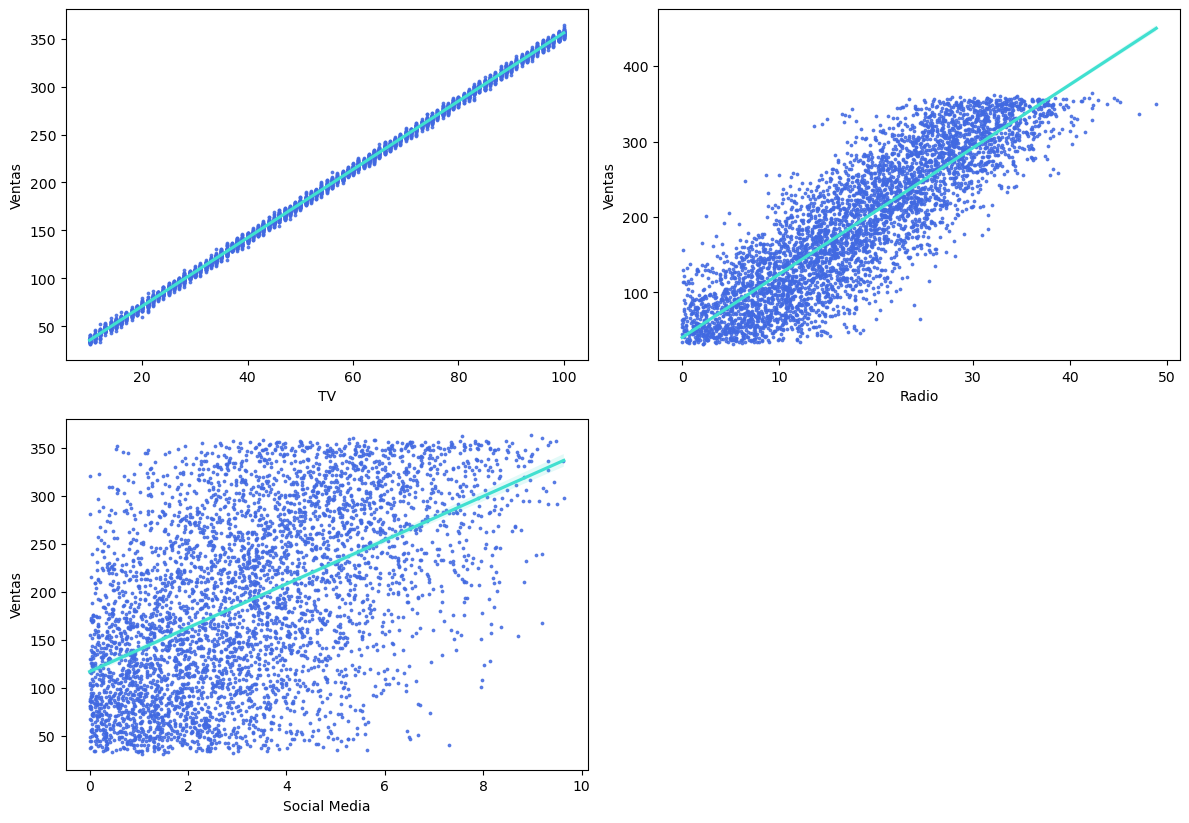

In [66]:
# Número de las variables
n = 6
fig = plt.figure(figsize=(12,12))
# Correlaciones en pares
corr = df.corr(numeric_only=True)
#
cols = corr.nlargest(6, "Ventas")["Ventas"].index
# Calculate correlation
for i in np.arange(1,5):
    if(i != 4):
        regline = df[cols[i]]
        ax = fig.add_subplot(3,2,i)
        sns.regplot(x=regline, y=df['Ventas'], scatter_kws={"color": "royalblue", "s": 3},
                    line_kws={"color": "turquoise"})
plt.tight_layout()
plt.show()

### 7. Comente que variables escogerán como variable dependiente y que variables introducirán a su modelo de regresión lineal, como variables explicativas. Justifique su respuesta.

Según las gráficas de correlación se puede observar que a medida de que el presupuesto de TV, Radio y Social Media aumentan el valor de Ventas también aumenta. 

Por ello, se puede decir que la variable dependiente es la de Ventas y las variables explicativas serían TV, Radio, Influencer y Social Media.

### 8. Grabe el primer modelo de regresión y otórguele el alias de su preferencia. Comente los resultados del modelo.

Primero se va a transformar la variable cualificativa de Influencer a cuantitativa utilizando labelEncoder:

In [105]:
var_cuantitativas = df.select_dtypes('number').columns
var_cualitativas  =df.select_dtypes('object').columns

In [106]:
from sklearn.preprocessing import LabelEncoder

In [107]:
# creating instance of labelencoder
labelencoder = LabelEncoder()

In [128]:
df.Influencer = labelencoder.fit_transform(df.Influencer)
df

,TV,Radio,Social_Media,Influencer,Ventas,log_Ventas,log_ventas
0,16.0,6.566231,2.907983,1,54.732757,4.002462,4.002462
1,13.0,9.237765,2.409567,1,46.677897,3.843271,3.843271
2,41.0,15.886446,2.913410,1,150.177829,5.011820,5.011820
3,83.0,30.020028,6.922304,1,298.246340,5.697920,5.697920
4,15.0,8.437408,1.405998,2,56.594181,4.035906,4.035906
...,...,...,...,...,...,...,...
4541,26.0,4.472360,0.717090,2,94.685866,4.550565,4.550565
4542,71.0,20.610685,6.545573,3,249.101915,5.517862,5.517862
4543,44.0,19.800072,5.096192,2,163.631457,5.097617,5.097617
4544,71.0,17.534640,1.940873,0,253.610411,5.535799,5.535799


Aplicamos logaritmos a nuestra variable dependiente:

In [109]:
log_ventas=np.log(df.Ventas)
df['log_ventas']=log_ventas

Procedemos con la aplicación de la regresión lineal:

In [112]:
regresion = ols("log_ventas ~ TV + Radio + Influencer + Social_Media", data=df)
results = regresion.fit()

In [113]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             log_ventas   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                 1.372e+04
Date:                Sun, 25 Feb 2024   Prob (F-statistic):               0.00
Time:                        13:05:26   Log-Likelihood:                 1759.3
No. Observations:                4518   AIC:                            -3509.
Df Residuals:                    4513   BIC:                            -3477.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        3.9340      0.007    589.542   

Podemos observar que el R^2 ajustado es de el 0.924 lo que quiere decir que nuestro modelo alcanza a explicar un 92.4% la variablididad de nuestra variable dependiente con la inclusión de 3 variables.

No todas la variables pasaron el 95% de confianza. La variable de Influencer es mayor al 0.05 por lo que no debería ser tomada como variable explicativa.

### 9. Verifique los supuestos de la regresión lineal. Comente cada uno de ellos. 

#### 1. Multicolinearidad

In [115]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [116]:
df2=df[df.columns.difference(['Ventas', 'log_ventas'])]
df2

,Influencer,Radio,Social_Media,TV,log_Ventas
0,1,6.566231,2.907983,16.0,4.002462
1,1,9.237765,2.409567,13.0,3.843271
2,1,15.886446,2.913410,41.0,5.011820
3,1,30.020028,6.922304,83.0,5.697920
4,2,8.437408,1.405998,15.0,4.035906
...,...,...,...,...,...
4541,2,4.472360,0.717090,26.0,4.550565
4542,3,20.610685,6.545573,71.0,5.517862
4543,2,19.800072,5.096192,44.0,5.097617
4544,0,17.534640,1.940873,71.0,5.535799


In [117]:
df2.dtypes

Influencer        int64
Radio           float64
Social_Media    float64
TV              float64
log_Ventas      float64
dtype: object

Ahora si, calculemos el VIF de nuestras variables para ver que tan correlacionadas están entre sí:

In [118]:
# Creamos el dataframe del VIF
vif_data = pd.DataFrame()
vif_data["feature"] = df2.columns
  
# Calculamos el VIF por c/variable
vif_data["VIF"] = [variance_inflation_factor(df2.values, i) for i in range(len(df2.columns))]

print(vif_data)
  

        feature        VIF
0    Influencer   2.823354
1         Radio  20.875245
2  Social_Media   5.225595
3            TV  25.112731
4    log_Ventas  12.602012


Solo la variable de Influencer es la única que no es mayor a 5, por lo que tiene una correlación moderada con Ventas pero no es potencialmente severa.

Aplicamos nuevamente el VIF habiendo removido la variable de Influencer.

In [132]:
regresion_2 = ols("log_ventas ~ TV + Radio + Social_Media", data=df)
results_2 = regresion_2.fit()

In [133]:
print(results_2.summary())

                            OLS Regression Results                            
Dep. Variable:             log_ventas   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                 1.829e+04
Date:                Sun, 25 Feb 2024   Prob (F-statistic):               0.00
Time:                        13:20:39   Log-Likelihood:                 1758.9
No. Observations:                4518   AIC:                            -3510.
Df Residuals:                    4514   BIC:                            -3484.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        3.9309      0.006    683.876   

In [135]:
# Creamos el dataframe del VIF
vif_data = pd.DataFrame()
vif_data["feature"] = df2.columns.difference(['Influencer'])
  
# Calculamos el VIF por c/variable
vif_data["VIF"] = [variance_inflation_factor(df2[df2.columns.difference(['Influencer'])].values, i) \
                   for i in range(len(df2[df2.columns.difference(['Influencer'])].columns))]

print(vif_data)
  

        feature        VIF
0         Radio  20.872726
1  Social_Media   5.225237
2            TV  24.854078
3    log_Ventas   9.396369


Observamos que mantenemos la misma R-squared ajustada.

#### 2. Linealidad en los parámetros

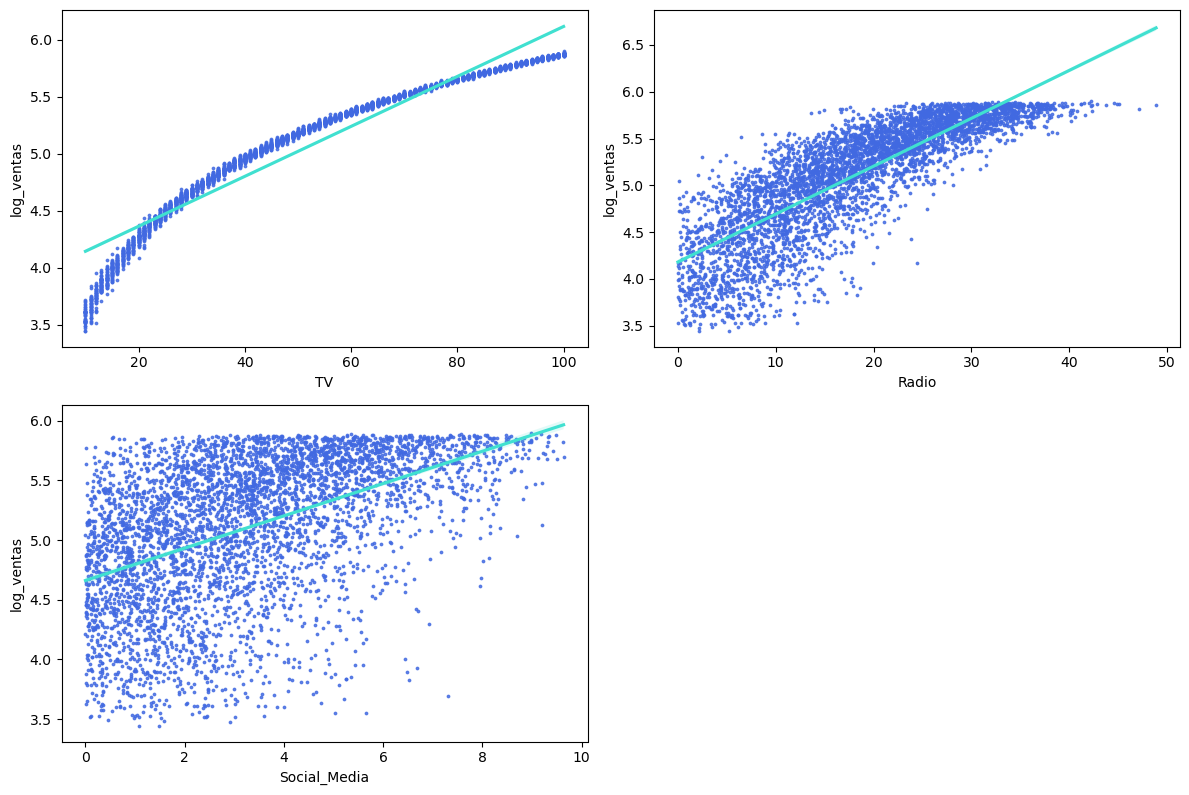

In [141]:
# Número de las variables
n = 6
fig = plt.figure(figsize=(12,12))
# Correlaciones en pares
corr = df.corr(numeric_only=True)
#
cols = corr.nlargest(6, "log_ventas")["log_ventas"].index
# Calculate correlation
for i in np.arange(3,6):
    regline = df[cols[i]]
    ax = fig.add_subplot(3,2,i)
    sns.regplot(x=regline, y=df['log_ventas'], scatter_kws={"color": "royalblue", "s": 3},
                line_kws={"color": "turquoise"})
plt.tight_layout()
plt.show()

Se puede observar que las variables de TV y Radio sus nubes de puntos no son tan dispersos a la línea de regresión. Por ello, gráficamente sí existe una relación lineal. Por otro lado, la variable Social Media no está tan relacionada a la línea de regresión.

#### 3. Normalidad en los residuos

Para la normalidad en los residuos del modelo, compararemos mediantelos gráficos QQ (o gráfico de cuantiles-cuantiles)si los puntos del gráfico forman aproximadamente una línea diagonal recta.

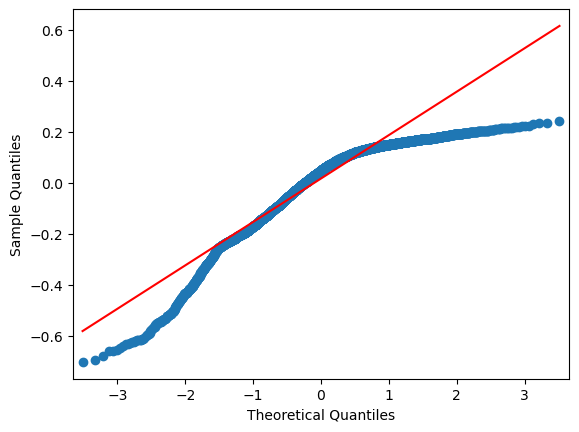

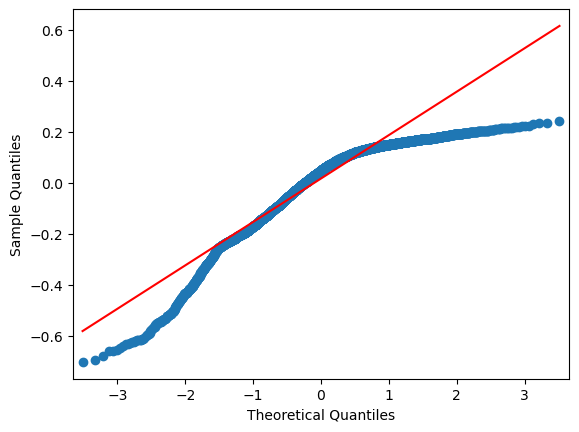

In [142]:
sm.qqplot(results_2.resid, line='q')

Como podemos ver, las líneas azules que representan a los residuos caen cerca de la línea recta. Podemos observar en el gráfico de igual manera que existen observaciones que caen muy por fuera de la línea, por lo que un anális con la prueba de Jarque-Bera para validar la hipótesis de normalidad en residuos podría ser útil.

Para aplicar una prueba estadística como la de Jarque Bera, es conveniente importar un submódulo de statsmodels que son las estadisticas "stats"

In [143]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

Recordemos que el test Jarque-Bera es una prueba de bondad de ajuste que determina si los datos de la muestra tienen asimetría y curtosis que coinciden con una distribución normal.

Como norma general, el estadístico de prueba de la prueba de Jarque-Bera es siempre un número positivo y cuanto más alejado de cero esté, habrá más evidencia de que los datos de la muestra no siguen una distribución normal.

La hipótesis nula de este test es:

- H0: Los datos se distribuyen normalmente
- H1: Los datos no se distribuyen normalmente

In [145]:
nombres = ["Jarque-Bera", "Chi^2 two-tail prob.", "Skew", "Kurtosis"]
jarque_bera = sms.jarque_bera(results_2.resid)
lzip(nombres, jarque_bera)

[('Jarque-Bera', 1401.7964272743109),
 ('Chi^2 two-tail prob.', 4.0158126324252745e-305),
 ('Skew', -1.1940463355143487),
 ('Kurtosis', 4.320407194636716)]

Los resultados sugieren que los datos no siguen una distribución normal, ya que la probabilidad asociada con la prueba Jarque-Bera es extremadamente baja. Además, la asimetría negativa y la kurtosis alta indican que la distribución tiene colas pesadas y un pico más alto en comparación con una distribución normal.

Finalmemte, podemos contrastar si la media de los residuos de este modelo es 0, o muy cercano a este. Para esto podemos extraer los residuos del modelo y calcular la media directamente:

In [146]:
results_2.resid.mean()

-6.203586166725764e-15

#### 4. Homocedasticidad en los residuos

Para comprobar este supuesto podemos graficar los valores ajustados frente a una gráfica de residuos. De existir heterocedasticidad, los residuos se dispersarán mucho más a medida que los valores ajustados aumenten creando una imagen de cono.

Aplicando a Python este gráfico se obtendría por medio del comando residplot dentro de seaborn.

In [147]:
y_pred=results_2.predict()

Text(0.5, 1.0, 'Gráfica de residuos')

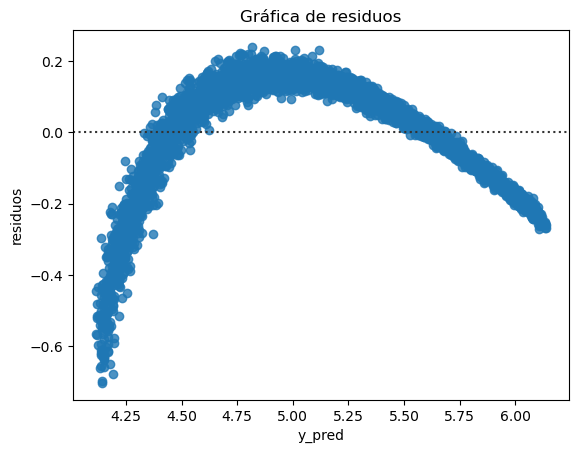

In [149]:
sns.residplot(x=y_pred, y=results_2.resid)
plt.xlabel("y_pred")
plt.ylabel("residuos")
plt.title("Gráfica de residuos")

De la gráfica de residuos anterior, podríamos inferir que los residuos formaron ningún patrón. Por lo tanto, los residuos son dependientes entre sí.

Y además, los residuos tienen varianza constante. La varianza no parece aumentar/disminuir constantemente con el valor y_pred.

In [150]:
nombres = ["Lagrange multiplier statistic", "p-value", "f-value", "f p-value"]
breuschpagan = sms.het_breuschpagan(results_2.resid, results.model.exog)
lzip(nombres, breuschpagan)

[('Lagrange multiplier statistic', 493.48643234570386),
 ('p-value', 1.7170563197229087e-105),
 ('f-value', 138.3461772297017),
 ('f p-value', 1.104435253877702e-111)]

Los resultados sugieren fuerte evidencia en contra de la hipótesis nula de homocedasticidad, lo que indica la presencia de heterocedasticidad en el modelo de regresión. La presencia de heterocedasticidad puede afectar la validez de las pruebas de significancia de los coeficientes en el modelo

### 10. Obtenga el modelo de regresión definitivo, argumente su respuesta e interprete los coeficientes.

Nuestra función lineal quedaría de la siguiente manera:

$$log_ventas = 3.93 + 0.02  \times  TV - 0.00012 \times Radio + 0.0065 \times Social Media $$


El modelo sugiere que la publicidad en TV tiene un impacto positivo en las ventas, mientras que la publicidad en radio y en redes sociales tiene un impacto negativo.

### 11. Grafique los valores predicho del modelo vs los valores reales. 

In [151]:
df3=df2[df2.columns.difference(['log_ventas', 'log_Ventas', 'Influencer', 'Ventas'])]
# df3['intercepto']=1
df3=df3[[ 'TV', 'Radio', 'Social_Media']]
df3

,TV,Radio,Social_Media
0,16.0,6.566231,2.907983
1,13.0,9.237765,2.409567
2,41.0,15.886446,2.913410
3,83.0,30.020028,6.922304
4,15.0,8.437408,1.405998
...,...,...,...
4541,26.0,4.472360,0.717090
4542,71.0,20.610685,6.545573
4543,44.0,19.800072,5.096192
4544,71.0,17.534640,1.940873


In [152]:
results_2.predict()

array([4.26571384, 4.19814649, 4.81936502, ..., 4.8684233 , 5.50107221,
       4.82800296])

In [156]:
y_pred2=results_2.predict(df3)
y_pred2

0       4.265714
1       4.198146
2       4.819365
3       5.725290
4       4.250734
          ...   
4541    4.508107
4542    5.467644
4543    4.868423
4544    5.501072
4545    4.828003
Length: 4518, dtype: float64

### Comparemos las predicciones a los valores reales de Y

In [157]:
df.log_ventas

0       4.002462
1       3.843271
2       5.011820
3       5.697920
4       4.035906
          ...   
4541    4.550565
4542    5.517862
4543    5.097617
4544    5.535799
4545    4.998579
Name: log_ventas, Length: 4518, dtype: float64